This code aims to use the strong classification between a foods nutrients and its respective food group, to use the food groups to more effectively predict carbon intensity, by applying gradient boosting at a food group specific dataset. This works well for food groups such as vegetables, where the carbon intensity was different across the food group, however for products such as bread this method obviously made the completely correct predicitions as their was limited (non in the case of bread) diversity in the carbon intensity across the food group. This method would be more effective over a more diverse data set when there was larger varience across the food groups, and where we had unique carbon intensity data for every single food product, which might be the case in a few more years. 

In [1]:
#importing modules for the implementation
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt 
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib as mpl
from sklearn.feature_selection import SelectFromModel

In [2]:
#pulling the data from the pickled dataset 
nutrition = pd.read_csv("./Nutrition_Full_Features.csv")


In [3]:
#dropping NANSinclude a lot of NaNs
#nutrition.drop(nutrition.columns[1:3], axis=1, inplace=True)
nutrition = nutrition.dropna()
nutrition

,name,Food Group,Price (£),Weight (GRAMS),Price per Weight (£/100Gram),Carbon Group,Land use (m2/100g),GHG(kgco2eq/100g),Water use (L/100g),Acidifying emissions(kgSO2eq per 100g),...,"Carotene, alpha (mcg)",Lycopene (mcg),Lutein + Zeaxanthin (mcg),"Fatty acids, total monounsaturated (mg)","Fatty acids, total polyunsaturated (mg)",20:5 n-3 (EPA) (mg),22:5 n-3 (DPA) (mg),22:6 n-3 (DHA) (mg),Caffeine (mg),Theobromine (mg)
1,Waffles Buttermilk Frozen Ready-To-Heat,Baked Foods,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,...,0.0,0.0,63.0,4530.0,1445.0,12.0,0.0,7.0,0.0,0.0
2,Waffle Buttermilk Frozen Ready-To-Heat Toasted,Baked Foods,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,...,0.0,0.0,66.0,5292.0,1502.0,13.0,0.0,8.0,0.0,0.0
5,Dutch Apple Pie,Baked Foods,2.80,500.0,0.560000,Bread products,0.3482,0.1441,56.7,0.001209,...,0.0,1.0,42.0,5797.0,2117.0,0.0,0.0,0.0,0.0,0.0
9,Bread White Wheat,Baked Foods,0.95,800.0,0.118750,Bread products,0.3482,0.1441,56.7,0.001209,...,0.0,0.0,25.0,393.0,973.0,3.0,0.0,0.0,0.0,0.0
10,Bagels Wheat,Baked Foods,1.60,450.0,0.355556,Bread products,0.3482,0.1441,56.7,0.001209,...,0.0,0.0,88.0,290.0,936.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,Plantain Fried,Vegetables,0.90,85.0,1.058824,Other vegetables,0.0310,0.0455,8.3,0.000531,...,418.0,0.0,29.0,4099.0,4079.0,0.0,0.0,0.0,0.0,0.0
1219,Romaine Lettuce Raw,Vegetables,1.00,400.0,0.250000,Other vegetables,0.0310,0.0455,8.3,0.000531,...,0.0,0.0,4204.0,7.0,126.0,0.0,0.0,0.0,0.0,0.0
1220,Palak Paneer,Vegetables,3.75,500.0,0.750000,Cheese,8.0642,2.1240,473.5,0.014894,...,12.0,313.0,4097.0,2402.0,2112.0,0.0,0.0,0.0,0.0,0.0
1221,Carrots Raw Salad,Vegetables,0.41,1000.0,0.041000,Other vegetables,0.0310,0.0455,8.3,0.000531,...,2157.0,1.0,162.0,3498.0,9319.0,0.0,0.0,1.0,0.0,0.0


In [4]:
#extracting the nutrition data, labelling X as this is the input to the SKlearn algorithm
X = nutrition.iloc[:,11:]
X

,Calories,Fat (g),Protein (g),Carbohydrate (g),Sugars (g),Fiber (g),Saturated Fats (g),Calcium (mg),"Iron, Fe (mg)","Potassium, K (mg)",...,"Carotene, alpha (mcg)",Lycopene (mcg),Lutein + Zeaxanthin (mcg),"Fatty acids, total monounsaturated (mg)","Fatty acids, total polyunsaturated (mg)",20:5 n-3 (EPA) (mg),22:5 n-3 (DPA) (mg),22:6 n-3 (DHA) (mg),Caffeine (mg),Theobromine (mg)
1,273,9.22,6.58,41.05,4.30,2.2,1.898,279,6.04,126.0,...,0.0,0.0,63.0,4530.0,1445.0,12.0,0.0,7.0,0.0,0.0
2,309,9.49,7.42,48.39,4.41,2.6,2.275,299,6.59,138.0,...,0.0,0.0,66.0,5292.0,1502.0,13.0,0.0,8.0,0.0,0.0
5,290,11.50,2.17,44.54,22.02,1.6,2.313,14,0.91,76.0,...,0.0,1.0,42.0,5797.0,2117.0,0.0,0.0,0.0,0.0,0.0
9,238,2.15,10.66,43.91,5.00,9.2,0.630,684,4.89,127.0,...,0.0,0.0,25.0,393.0,973.0,3.0,0.0,0.0,0.0,0.0
10,250,1.53,10.20,48.89,6.12,4.1,0.000,20,2.76,165.0,...,0.0,0.0,88.0,290.0,936.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,241,10.16,1.66,40.60,19.10,2.9,1.507,4,0.78,572.0,...,418.0,0.0,29.0,4099.0,4079.0,0.0,0.0,0.0,0.0,0.0
1219,19,0.27,1.39,3.78,0.71,3.1,0.053,62,0.90,327.0,...,0.0,0.0,4204.0,7.0,126.0,0.0,0.0,0.0,0.0,0.0
1220,96,6.84,5.23,4.32,1.89,1.2,1.486,70,1.15,269.0,...,12.0,313.0,4097.0,2402.0,2112.0,0.0,0.0,0.0,0.0,0.0
1221,208,15.70,1.22,17.17,11.23,2.3,2.452,30,0.49,309.0,...,2157.0,1.0,162.0,3498.0,9319.0,0.0,0.0,1.0,0.0,0.0


In [5]:
#extracting the food groups
y = nutrition.iloc[:,1:2]
y

,Food Group
1,Baked Foods
2,Baked Foods
5,Baked Foods
9,Baked Foods
10,Baked Foods
...,...
1218,Vegetables
1219,Vegetables
1220,Vegetables
1221,Vegetables


In [6]:
Food_Groups = np.unique(y)
Food_Groups = np.ravel(Food_Groups)
Food_Groups = Food_Groups.tolist()



In [7]:
#changing y to a 1d array rather than the table 
y = np.ravel(y)
y

array(['Baked Foods', 'Baked Foods', 'Baked Foods', ..., 'Vegetables',
       'Vegetables', 'Vegetables'], dtype=object)

In [8]:
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,test_size=0.8) #size =0.2 means 80% data is training data, 20% testing


In [9]:
#splitting train data set into train and validation set 
X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val,test_size=0.01)

In [10]:
#importing bagging function from sklearn 
#storing the prediction from the test 
from sklearn.ensemble import RandomForestClassifier
#importing sklearn algorithm s 
#storing the prediction from the test 
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=25)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [11]:
model.score(X_test,y_test)

0.8033573141486811

In [12]:
y_pred_test = model.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline

matrix = confusion_matrix(y_test,y_pred_test)
matrix

array([[148,   4,   5,   5,   0,   0,   0,   0,   0,   1,   0,   0,   0,
          0,   1,   0],
       [  0,  32,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          2,   0,   3],
       [  0,   2,  96,   1,   2,   0,   0,   0,   5,   0,   0,   0,   0,
          0,   0,   0],
       [  0,   1,   0,  35,   0,   0,   0,   0,   0,   5,   0,   0,   0,
          0,   0,   0],
       [  2,   0,   2,   0,  41,   0,   0,   1,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  1,   0,   1,   0,   3,   0,   0,   0,   2,   0,   0,   0,   0,
          0,   0,   0],
       [  2,   0,   9,   0,   3,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  0,   0,   1,   0,   0,   0,   0,   7,   0,   0,   8,   0,   0,
          0,   0,   0],
       [  0,   0,  11,   0,   0,   0,   0,   0,  28,   0,   0,   0,   0,
          1,   0,  15],
       [  4,   0,   3,   7,   0,   0,   0,   0,   0,  16,   0,   0,   0,
          0,   0,   0],
       [  0,   1,   2,   0,   

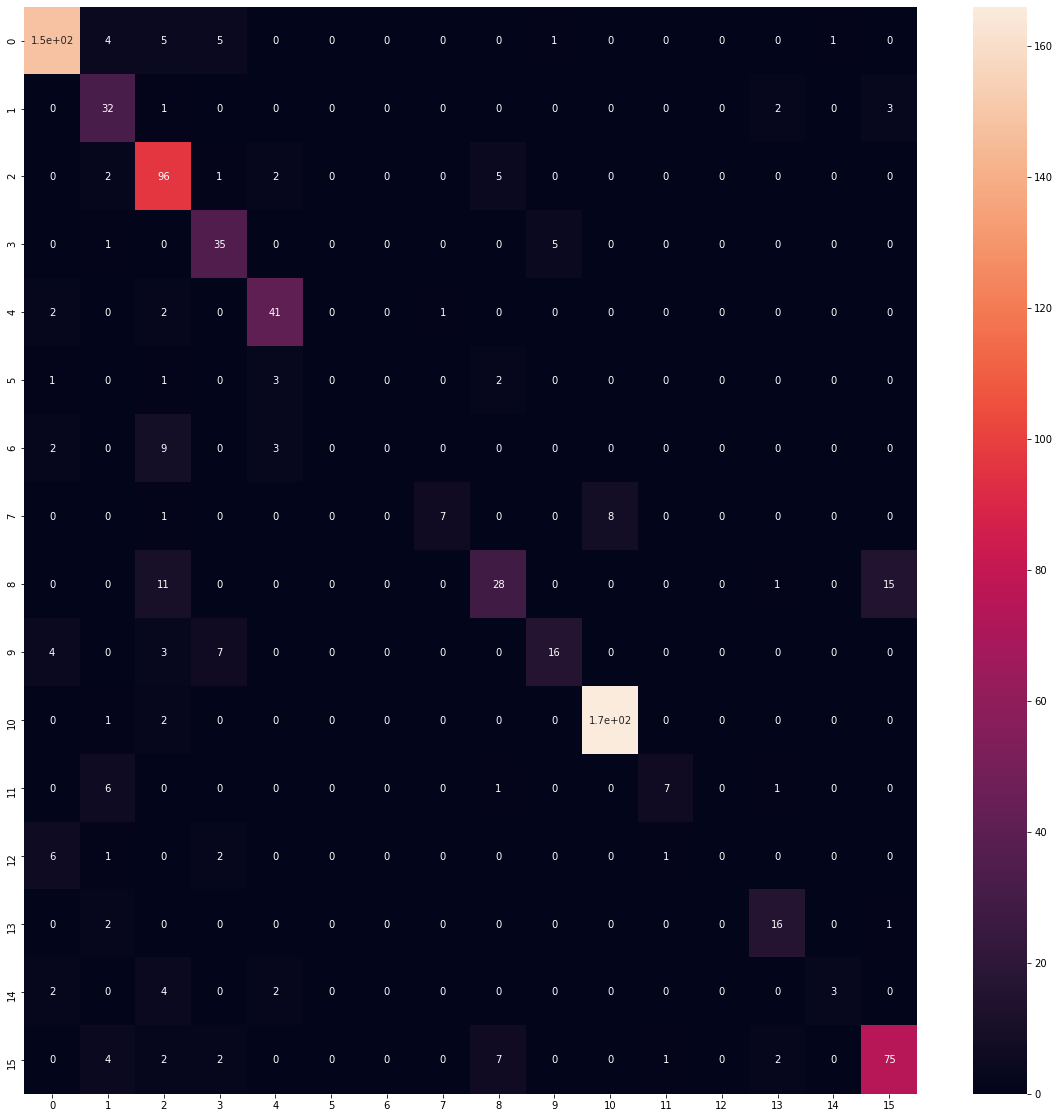

In [14]:
import seaborn as sns 
plt.figure(figsize = (20,20))
sns.heatmap(matrix, annot=True)
plt.show()

In [38]:
print(classification_report(y_test, y_pred_test))

                         precision    recall  f1-score   support

            Baked Foods       0.78      0.92      0.85       155
      Beans and Lentils       0.78      0.72      0.75        39
              Beverages       0.83      0.86      0.85       105
      Breakfast Cereals       0.91      0.78      0.84        41
 Dairy and Egg Products       0.85      0.83      0.84        47
Dairy and Egg Products        0.00      0.00      0.00         6
          Fats and Oils       0.71      0.45      0.56        11
                   Fish       0.00      0.00      0.00        19
                 Fruits       0.76      0.71      0.74        49
       Grains and Pasta       0.58      0.70      0.64        30
                  Meats       0.88      0.99      0.94       182
         Nuts and Seeds       0.79      0.73      0.76        15
                 Snacks       0.33      0.11      0.17         9
       Spices and Herbs       1.00      0.57      0.73        21
                 Sweets 

C:\Users\han\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
#boosted trees regression
# defining dataset for bread products 
Bread_Nutrition = nutrition[nutrition['Food Group'] == 'Vegetables']
Bread_Nutrition

,name,Food Group,Price (£),Weight (GRAMS),Price per Weight (£/100Gram),Carbon Group,Land use (m2/100g),GHG(kgco2eq/100g),Water use (L/100g),Acidifying emissions(kgSO2eq per 100g),...,"Carotene, alpha (mcg)",Lycopene (mcg),Lutein + Zeaxanthin (mcg),"Fatty acids, total monounsaturated (mg)","Fatty acids, total polyunsaturated (mg)",20:5 n-3 (EPA) (mg),22:5 n-3 (DPA) (mg),22:6 n-3 (DHA) (mg),Caffeine (mg),Theobromine (mg)
1065,Asparagus,Vegetables,2.00,250.0,0.800000,Other vegetables,0.0310,0.0455,8.3,0.000531,...,9.0,0.0,710.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0
1067,Cucumber,Vegetables,0.75,550.0,0.136364,Other Fruit,0.0610,0.0750,11.9,0.000438,...,11.0,0.0,23.0,5.0,32.0,0.0,0.0,0.0,0.0,0.0
1068,Kale,Vegetables,0.62,180.0,0.344444,"Cruciferous Veg ( Cauliflower, broccili )",0.0452,0.0437,9.7,0.000686,...,0.0,0.0,6261.0,104.0,673.0,0.0,0.0,0.0,0.0,0.0
1069,Dried Shiitake Mushrooms,Vegetables,3.00,40.0,7.500000,Other vegetables,0.0310,0.0455,8.3,0.000531,...,0.0,0.0,0.0,317.0,151.0,0.0,0.0,0.0,0.0,0.0
1071,Spinach,Vegetables,1.80,200.0,0.900000,Other vegetables,0.0310,0.0455,8.3,0.000531,...,0.0,0.0,12198.0,10.0,165.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,Plantain Fried,Vegetables,0.90,85.0,1.058824,Other vegetables,0.0310,0.0455,8.3,0.000531,...,418.0,0.0,29.0,4099.0,4079.0,0.0,0.0,0.0,0.0,0.0
1219,Romaine Lettuce Raw,Vegetables,1.00,400.0,0.250000,Other vegetables,0.0310,0.0455,8.3,0.000531,...,0.0,0.0,4204.0,7.0,126.0,0.0,0.0,0.0,0.0,0.0
1220,Palak Paneer,Vegetables,3.75,500.0,0.750000,Cheese,8.0642,2.1240,473.5,0.014894,...,12.0,313.0,4097.0,2402.0,2112.0,0.0,0.0,0.0,0.0,0.0
1221,Carrots Raw Salad,Vegetables,0.41,1000.0,0.041000,Other vegetables,0.0310,0.0455,8.3,0.000531,...,2157.0,1.0,162.0,3498.0,9319.0,0.0,0.0,1.0,0.0,0.0


In [39]:
X_Bread = Bread_Nutrition.iloc[:,11:].astype('float64').dropna()
X_Bread

,Calories,Fat (g),Protein (g),Carbohydrate (g),Sugars (g),Fiber (g),Saturated Fats (g),Calcium (mg),"Iron, Fe (mg)","Potassium, K (mg)",...,"Carotene, alpha (mcg)",Lycopene (mcg),Lutein + Zeaxanthin (mcg),"Fatty acids, total monounsaturated (mg)","Fatty acids, total polyunsaturated (mg)",20:5 n-3 (EPA) (mg),22:5 n-3 (DPA) (mg),22:6 n-3 (DHA) (mg),Caffeine (mg),Theobromine (mg)
1065,20.0,0.12,2.20,3.88,1.88,2.1,0.040,24.0,2.14,202.0,...,9.0,0.0,710.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0
1067,15.0,0.11,0.65,3.63,1.67,0.5,0.037,16.0,0.28,147.0,...,11.0,0.0,23.0,5.0,32.0,0.0,0.0,0.0,0.0,0.0
1068,35.0,1.49,2.92,4.42,0.99,4.1,0.178,254.0,1.60,348.0,...,0.0,0.0,6261.0,104.0,673.0,0.0,0.0,0.0,0.0,0.0
1069,296.0,0.99,9.58,75.37,2.21,11.5,0.225,11.0,1.72,1534.0,...,0.0,0.0,0.0,317.0,151.0,0.0,0.0,0.0,0.0,0.0
1071,23.0,0.39,2.86,3.63,0.42,2.2,0.063,99.0,2.71,558.0,...,0.0,0.0,12198.0,10.0,165.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,241.0,10.16,1.66,40.60,19.10,2.9,1.507,4.0,0.78,572.0,...,418.0,0.0,29.0,4099.0,4079.0,0.0,0.0,0.0,0.0,0.0
1219,19.0,0.27,1.39,3.78,0.71,3.1,0.053,62.0,0.90,327.0,...,0.0,0.0,4204.0,7.0,126.0,0.0,0.0,0.0,0.0,0.0
1220,96.0,6.84,5.23,4.32,1.89,1.2,1.486,70.0,1.15,269.0,...,12.0,313.0,4097.0,2402.0,2112.0,0.0,0.0,0.0,0.0,0.0
1221,208.0,15.70,1.22,17.17,11.23,2.3,2.452,30.0,0.49,309.0,...,2157.0,1.0,162.0,3498.0,9319.0,0.0,0.0,1.0,0.0,0.0


In [40]:
y_bread = Bread_Nutrition.iloc[:,7:8]
y_bread


,GHG(kgco2eq/100g)
1065,0.0455
1067,0.0750
1068,0.0437
1069,0.0455
1071,0.0455
...,...
1218,0.0455
1219,0.0455
1220,2.1240
1221,0.0455


In [41]:
y_bread = np.ravel(y_bread)
y_bread

array([0.0455, 0.075 , 0.0437, 0.0455, 0.0455, 0.037 , 0.0365, 0.0988,
       0.0455, 0.5752, 0.5752, 0.0455, 0.0455, 0.5752, 0.1427, 0.0455,
       0.0455, 0.0455, 0.1427, 0.037 , 0.0455, 0.0365, 0.0365, 0.0455,
       0.0455, 0.0455, 0.0455, 0.097 , 0.097 , 0.0455, 0.0455, 0.0455,
       0.0455, 0.0455, 0.0455, 0.0455, 0.037 , 0.0455, 0.0455, 0.0455,
       0.0455, 0.0455, 0.0365, 0.0455, 0.0455, 0.5752, 0.0455, 0.0455,
       0.0437, 0.0437, 0.0455, 0.0455, 0.037 , 0.0455, 0.0365, 0.0437,
       0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.097 , 0.097 , 0.0395,
       0.097 , 0.0395, 0.0395, 0.0365, 0.0455, 0.0455, 0.0455, 0.037 ,
       0.037 , 0.037 , 0.037 , 0.037 , 0.1427, 0.1427, 0.1427, 0.1427,
       0.0365, 0.0455, 0.0278, 0.0455, 0.037 , 0.0455, 0.0395, 0.0455,
       0.0395, 0.0455, 0.097 , 0.0455, 0.0455, 0.0437, 0.0437, 0.0455,
       0.5752, 0.0365, 0.0365, 0.0437, 0.0455, 0.097 , 0.037 , 0.037 ,
       0.037 , 0.1427, 0.1427, 0.0455, 0.075 , 0.0395, 0.0455, 0.037 ,
      

In [42]:
#splitting the dataset into a test and train data set, with 20% being used for testing
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X_Bread,y_bread,test_size=0.2) 

In [43]:
#splitting train data set into train and validation set 
X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val,test_size=0.15)

In [49]:
#importing bagging function from sklearn 
#storing the prediction from the test 
from sklearn.ensemble import GradientBoostingRegressor
#importing sklearn algorithm s 
#storing the prediction from the test 
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=30)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [50]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(np.std(y_bread))

Mean Absolute Error: 0.15598440656057147
Mean Squared Error: 0.20679358325666133
Root Mean Squared Error: 0.4547456247801196
0.21684519693567267


In [46]:
#writing a for loop to pull out the error at varying n_estimators (otherwise known as the number of trees the algorithm is using)


mse = []
mae = []
rmse = []
        
for i in range(1,200,5):
    from sklearn.ensemble import GradientBoostingRegressor
    model = GradientBoostingRegressor(n_estimators=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    Mean_Absolute_Error = metrics.mean_absolute_error(y_test, y_pred)
    Mean_Squared_Error = metrics.mean_squared_error(y_test, y_pred)
    Root_Mean_Squared_Error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
   
    mse.append(Mean_Squared_Error)
    rmse.append(Root_Mean_Squared_Error)
    mae.append(Mean_Absolute_Error)
    

<function matplotlib.pyplot.show(close=None, block=None)>

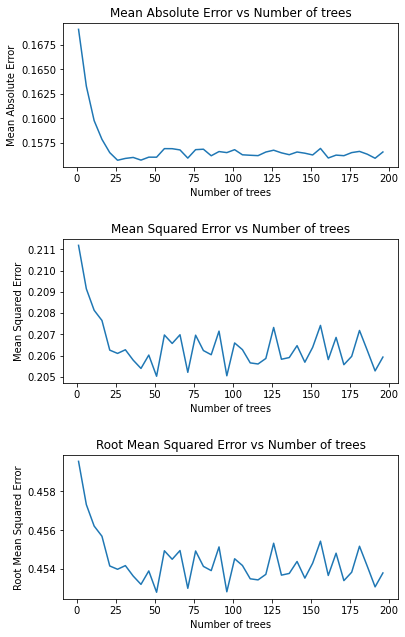

In [47]:
#creating a list of the number of estimators for ploting 
Number_estimators = list(range(1,200,5))


fig = plt.figure()
Absolute = plt.subplot(311)
Absolute.title.set_text('Mean Absolute Error vs Number of trees')
plt.plot(Number_estimators,mae)
plt.ylabel('Mean Absolute Error')
plt.xlabel('Number of trees')
plt.show

Square = plt.subplot(312)
Square.title.set_text('Mean Squared Error vs Number of trees')
plt.plot(Number_estimators,mse)
plt.ylabel('Mean Squared Error')
plt.xlabel('Number of trees')
plt.show

Root = plt.subplot(313)
Root.title.set_text('Root Mean Squared Error vs Number of trees')
plt.plot(Number_estimators,rmse)
plt.ylabel('Root Mean Squared Error')
plt.xlabel('Number of trees')
plt.subplots_adjust(top= 4, bottom=2, wspace=1, hspace=0.5)
plt.savefig('Error Plots')
plt.show



In [17]:
#automatically select features 
sel = SelectFromModel(model)
sel.fit(X_train, y_train)
#seeing which features are important 
#returns an array of trues when features are more important than mean 
# false when features are less important than mean importance 
sel.get_support()

# make a list and count selected features 

selected_feat = X_train.columns[(sel.get_support())]
#return the number of features selected by the random forest 
len(selected_feat)
#get the name of feautures selected 
print(selected_feat)

Index(['Fiber (g)', 'Saturated Fats (g)', 'Iron, Fe (mg)', 'Magnesium (mg)',
       'Water (g)', 'Omega 6s (mg)', 'Zinc, Zn (mg)',
       'Fatty acids, total polyunsaturated (mg)'],
      dtype='object')
